In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("Case study/ready_data2.csv")

In [5]:
df.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,MiscFeature_Othr,MiscFeature_TenC,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Partial,SalePrice
0,7,2003,2003,196.0,706,856,856,854,1710,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,208500
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181500
2,7,2001,2002,162.0,486,920,920,866,1786,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,223500
3,7,1915,1970,0.0,216,756,961,756,1717,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,140000
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,250000


In [6]:
sc = StandardScaler()

In [7]:
y = df["SalePrice"]
X = df.iloc[:,0:126]

In [8]:
X = sc.fit_transform(X)

In [9]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

In [10]:
X.shape

(1460, 126)

In [119]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(126,)),
    tf.keras.layers.Dense(260,activation="relu"),
    tf.keras.layers.Dense(160,activation="relu"),
    tf.keras.layers.Dense(160,activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [120]:
model.compile(optimizer="adam", loss="mean_squared_error",metrics=["mean_squared_error"])

In [121]:
training_history =model.fit(X_train,y_train,epochs=2000,validation_data=(X_test,y_test),batch_size=200)

Train on 1168 samples, validate on 292 samples
Epoch 1/2000
1168/1168 [==============================] - 1s 791us/step - loss: 38722480520.7671 - mean_squared_error: 38722480520.7671 - val_loss: 40303772714.0822 - val_mean_squared_error: 40303772714.0822
Epoch 2/2000
1168/1168 [==============================] - 0s 35us/step - loss: 38720626126.9041 - mean_squared_error: 38720626126.9041 - val_loss: 40300878525.3699 - val_mean_squared_error: 40300878525.3699
Epoch 3/2000
1168/1168 [==============================] - 0s 35us/step - loss: 38716418328.5479 - mean_squared_error: 38716418328.5479 - val_loss: 40294273865.6438 - val_mean_squared_error: 40294273865.6438
Epoch 4/2000
1168/1168 [==============================] - 0s 35us/step - loss: 38707318966.3562 - mean_squared_error: 38707318966.3562 - val_loss: 40280327939.5069 - val_mean_squared_error: 40280327939.5069
Epoch 5/2000
1168/1168 [==============================] - 0s 33us/step - loss: 38687729439.5616 - mean_squared_error: 386877

In [124]:
acc = training_history.history['val_mean_squared_error']
val_acc = training_history.history['mean_squared_error']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

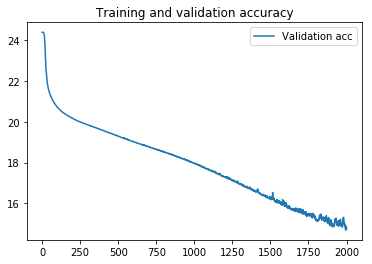

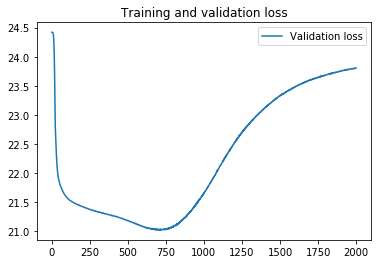

In [126]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

#plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, np.log(val_acc), label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

#plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, np.log(val_loss), label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [127]:
pred = model.predict(X_test)

In [128]:
y_score = [ p[0] for p in pred.tolist()]

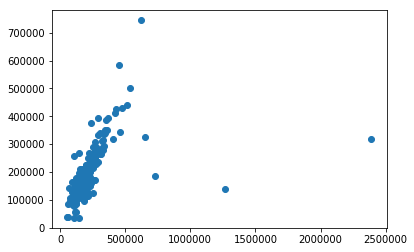

In [129]:
plt.scatter(y_score,y_test)
plt.show()

In [130]:
import numpy as np

In [131]:
np.corrcoef(y_score,y_test)[0][1]**2

0.2563060959521561

In [132]:
df=pd.DataFrame({"actual":y_test,"pred":y_score})

In [133]:
df["error"] = df["actual"] - df["pred"]

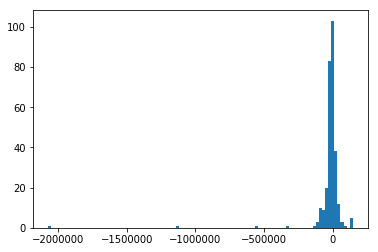

In [134]:
plt.hist(df["error"],bins=100)
plt.show()

In [135]:
print(df.shape)
df=df.loc[df["error"] > -250000]
print(df.shape)

(292, 3)
(288, 3)


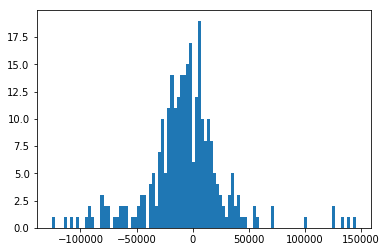

In [136]:
plt.hist(df["error"],bins=100)
plt.show()

In [137]:
np.corrcoef(df["actual"],df["pred"])[0][1]**2

0.8216064851094746